In [4]:
from google.colab import files

In [3]:
files.upload()

Saving data_monthly_rainfall.csv to data_monthly_rainfall.csv


{'data_monthly_rainfall.csv': b'Year,Station,Month,Rainfall,StationIndex\r\n2000,Barisal,1,19,2\r\n2000,Barisal,2,16,2\r\n2000,Barisal,3,50,2\r\n2000,Barisal,4,135,2\r\n2000,Barisal,5,246,2\r\n2000,Barisal,6,286,2\r\n2000,Barisal,7,389,2\r\n2000,Barisal,8,203,2\r\n2000,Barisal,9,245,2\r\n2000,Barisal,10,171,2\r\n2000,Barisal,11,10,2\r\n2000,Barisal,12,0,2\r\n2000,Bhola,1,42,3\r\n2000,Bhola,2,8,3\r\n2000,Bhola,3,61,3\r\n2000,Bhola,4,126,3\r\n2000,Bhola,5,279,3\r\n2000,Bhola,6,416,3\r\n2000,Bhola,7,432,3\r\n2000,Bhola,8,233,3\r\n2000,Bhola,9,206,3\r\n2000,Bhola,10,139,3\r\n2000,Bhola,11,89,3\r\n2000,Bhola,12,0,3\r\n2000,Bogra,1,18,4\r\n2000,Bogra,2,37,4\r\n2000,Bogra,3,76,4\r\n2000,Bogra,4,158,4\r\n2000,Bogra,5,272,4\r\n2000,Bogra,6,250,4\r\n2000,Bogra,7,190,4\r\n2000,Bogra,8,289,4\r\n2000,Bogra,9,466,4\r\n2000,Bogra,10,84,4\r\n2000,Bogra,11,0,4\r\n2000,Bogra,12,0,4\r\n2000,Chandpur,1,25,5\r\n2000,Chandpur,2,15,5\r\n2000,Chandpur,3,58,5\r\n2000,Chandpur,4,160,5\r\n2000,Chandpur,5,470,5\r

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

In [6]:
df=pd.read_csv('data_monthly_rainfall.csv')

In [7]:
df

,Year,Station,Month,Rainfall,StationIndex
0,2000,Barisal,1,19,2
1,2000,Barisal,2,16,2
2,2000,Barisal,3,50,2
3,2000,Barisal,4,135,2
4,2000,Barisal,5,246,2
...,...,...,...,...,...
6643,2016,Teknaf,8,920,33
6644,2016,Teknaf,9,512,33
6645,2016,Teknaf,10,208,33
6646,2016,Teknaf,11,53,33


In [8]:
df=df.drop(['StationIndex'],axis=1)

In [9]:
df

,Year,Station,Month,Rainfall
0,2000,Barisal,1,19
1,2000,Barisal,2,16
2,2000,Barisal,3,50
3,2000,Barisal,4,135
4,2000,Barisal,5,246
...,...,...,...,...
6643,2016,Teknaf,8,920
6644,2016,Teknaf,9,512
6645,2016,Teknaf,10,208
6646,2016,Teknaf,11,53


In [10]:
df=df[(df['Station']=='Barisal') | (df['Station']=='Khulna') | (df['Station']=='Faridpur') | (df['Station']=='Jessore') | (df['Station']=='Satkhira') | (df['Station']=='Khepupara') | (df['Station']=='Bhola') | (df['Station']=='Patuakhali')]

In [11]:
df

,Year,Station,Month,Rainfall
0,2000,Barisal,1,19
1,2000,Barisal,2,16
2,2000,Barisal,3,50
3,2000,Barisal,4,135
4,2000,Barisal,5,246
...,...,...,...,...
6583,2016,Satkhira,8,202
6584,2016,Satkhira,9,131
6585,2016,Satkhira,10,167
6586,2016,Satkhira,11,40


In [12]:
df['Station'].unique()

array(['Barisal', 'Bhola', 'Faridpur', 'Jessore', 'Khepupara', 'Khulna',
       'Patuakhali', 'Satkhira'], dtype=object)

In [13]:
#I use OrdinalEncoding to convert
# Barisal=0
# Bhola=1
# Faridpur=2
# Jessore=3
# Khepupara=4
# Khulna=5
# Patuakhali=6
# Satkhira=7

In [14]:
Districk=['Barisal', 'Bhola', 'Faridpur', 'Jessore', 'Khepupara', 'Khulna',
       'Patuakhali', 'Satkhira']
Dist_ord=OrdinalEncoder(categories=[Districk])
df['Station']=Dist_ord.fit_transform(df[['Station']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
df

,Year,Station,Month,Rainfall
0,2000,0.0,1,19
1,2000,0.0,2,16
2,2000,0.0,3,50
3,2000,0.0,4,135
4,2000,0.0,5,246
...,...,...,...,...
6583,2016,7.0,8,202
6584,2016,7.0,9,131
6585,2016,7.0,10,167
6586,2016,7.0,11,40


In [16]:
df['Station'].value_counts()

7.0    204
6.0    204
5.0    204
4.0    204
2.0    204
1.0    204
0.0    204
3.0    192
Name: Station, dtype: int64

In [17]:
df

,Year,Station,Month,Rainfall
0,2000,0.0,1,19
1,2000,0.0,2,16
2,2000,0.0,3,50
3,2000,0.0,4,135
4,2000,0.0,5,246
...,...,...,...,...
6583,2016,7.0,8,202
6584,2016,7.0,9,131
6585,2016,7.0,10,167
6586,2016,7.0,11,40


In [18]:
Mon=list(df['Month'])
Mon=[int(i) for i in Mon]

In [19]:
for i in range(0,len(Mon)):
    if(Mon[i]>=3 and Mon[i]<=5):
        Mon[i]="Pre-monsoon"
    elif(Mon[i]>=6 and Mon[i]<=10):
      Mon[i]="Monsoon"
    else:
      Mon[i]="Post-monsoon"

In [20]:
df['Month']=Mon

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df

,Year,Station,Month,Rainfall
0,2000,0.0,Post-monsoon,19
1,2000,0.0,Post-monsoon,16
2,2000,0.0,Pre-monsoon,50
3,2000,0.0,Pre-monsoon,135
4,2000,0.0,Pre-monsoon,246
...,...,...,...,...
6583,2016,7.0,Monsoon,202
6584,2016,7.0,Monsoon,131
6585,2016,7.0,Monsoon,167
6586,2016,7.0,Post-monsoon,40


In [22]:
Monsoon=df[(df['Month']=='Monsoon')]

In [23]:
Premonsoon=df[df['Month']=='Pre-monsoon']

In [24]:
Postmonsoon=df[df['Month']=='Post-monsoon']

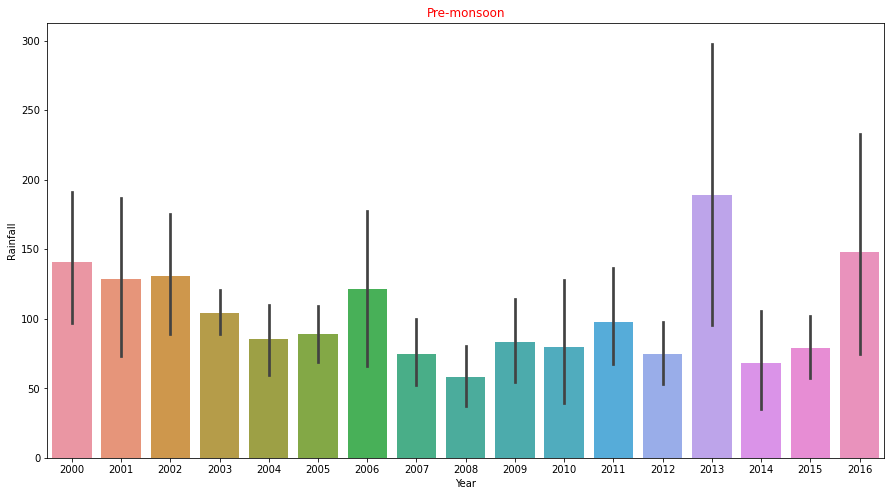

In [25]:
plt.figure(figsize=(15,8))
plt.title("Pre-monsoon",color='red')
sns.barplot(x='Year',y='Rainfall',data=Premonsoon)

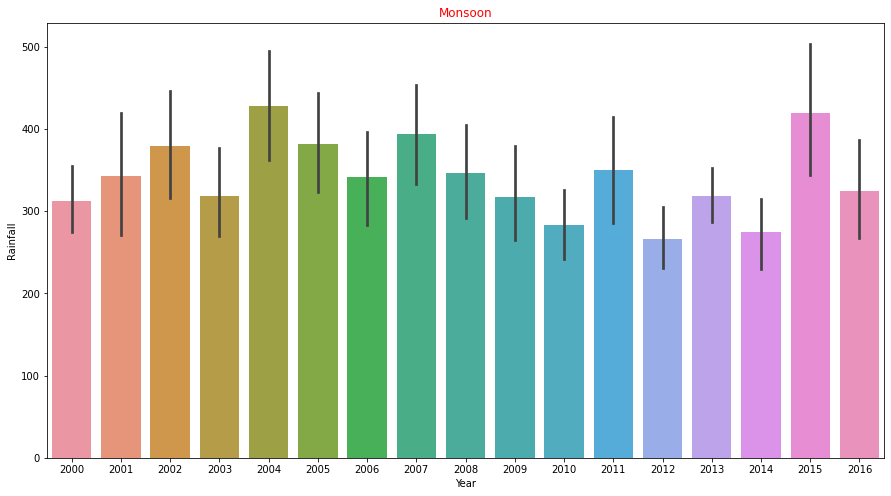

In [26]:
plt.figure(figsize=(15,8))
plt.title("Monsoon",color='red')
sns.barplot(x='Year',y='Rainfall',data=Monsoon)

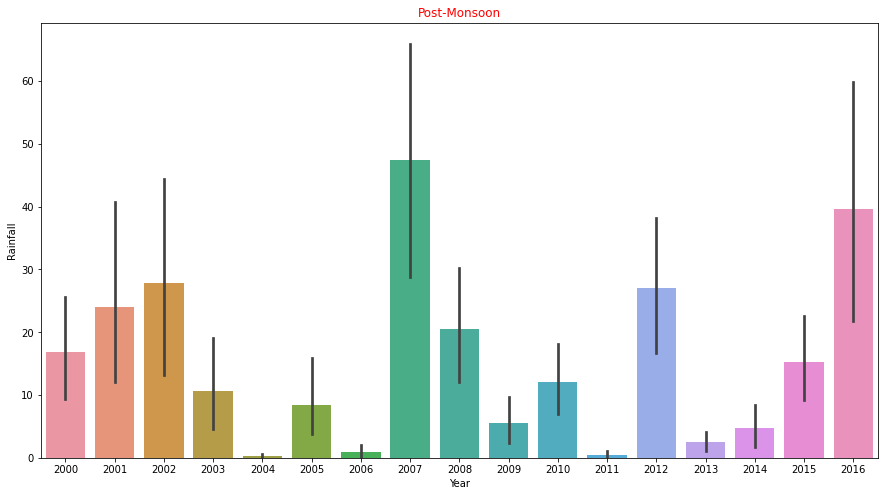

In [27]:
plt.figure(figsize=(15,8))
plt.title("Post-Monsoon",color='red')
sns.barplot(x='Year',y='Rainfall',data=Postmonsoon)

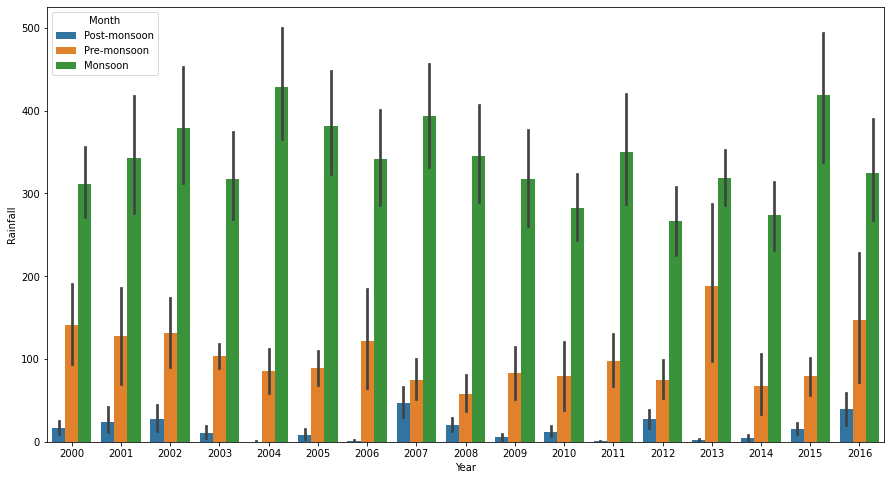

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x='Year',y='Rainfall',hue='Month',data=df)

In [29]:
Category=['Pre-monsoon','Monsoon','Post-monsoon']
Ordinal=OrdinalEncoder(categories=[Category])
df['Month']=Ordinal.fit_transform(df[['Month']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
test_df=pd.DataFrame()
test_df['Year']=np.random.randint(2017,2051,10000)
test_df['Month']=np.random.randint(1,4,10000)
test_df['Station']=np.random.randint(1,9,10000)

In [31]:
Reg=LinearRegression()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Predicted barplot from 2017 to 2050')

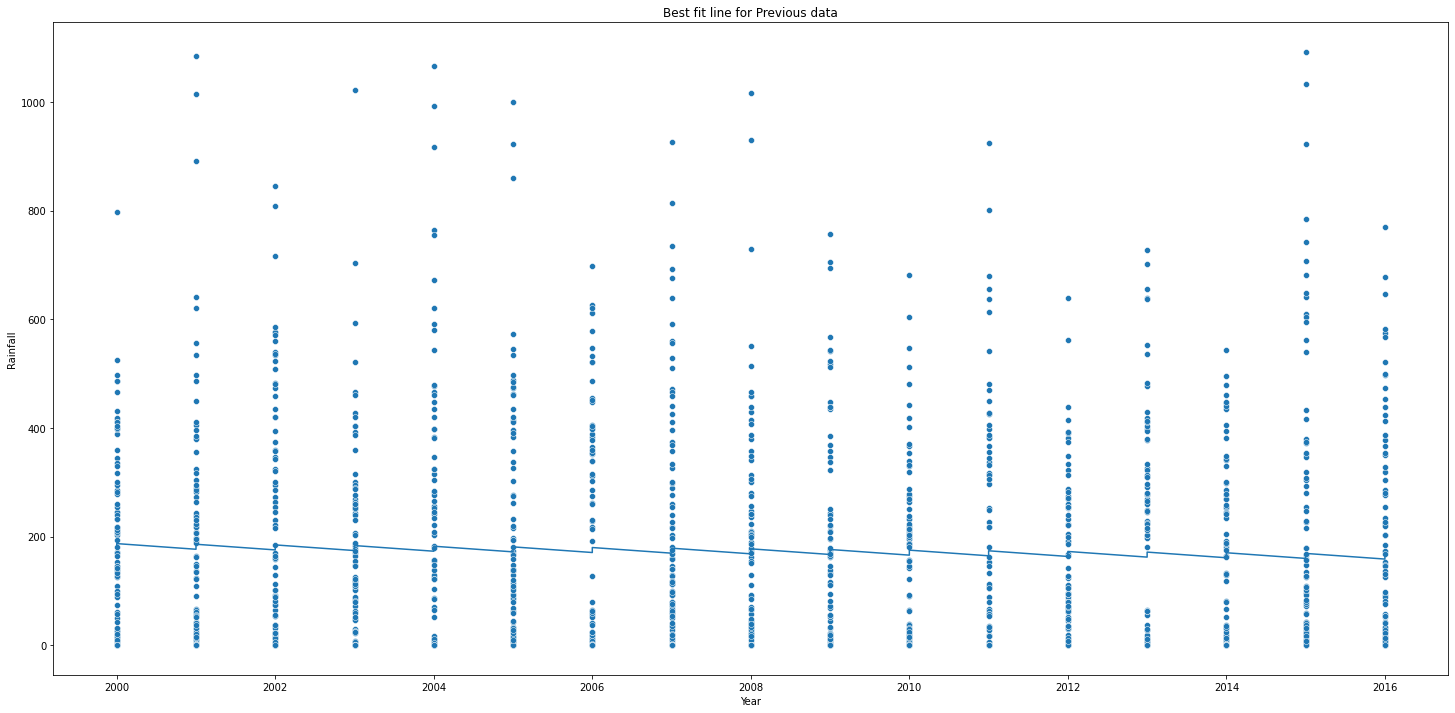

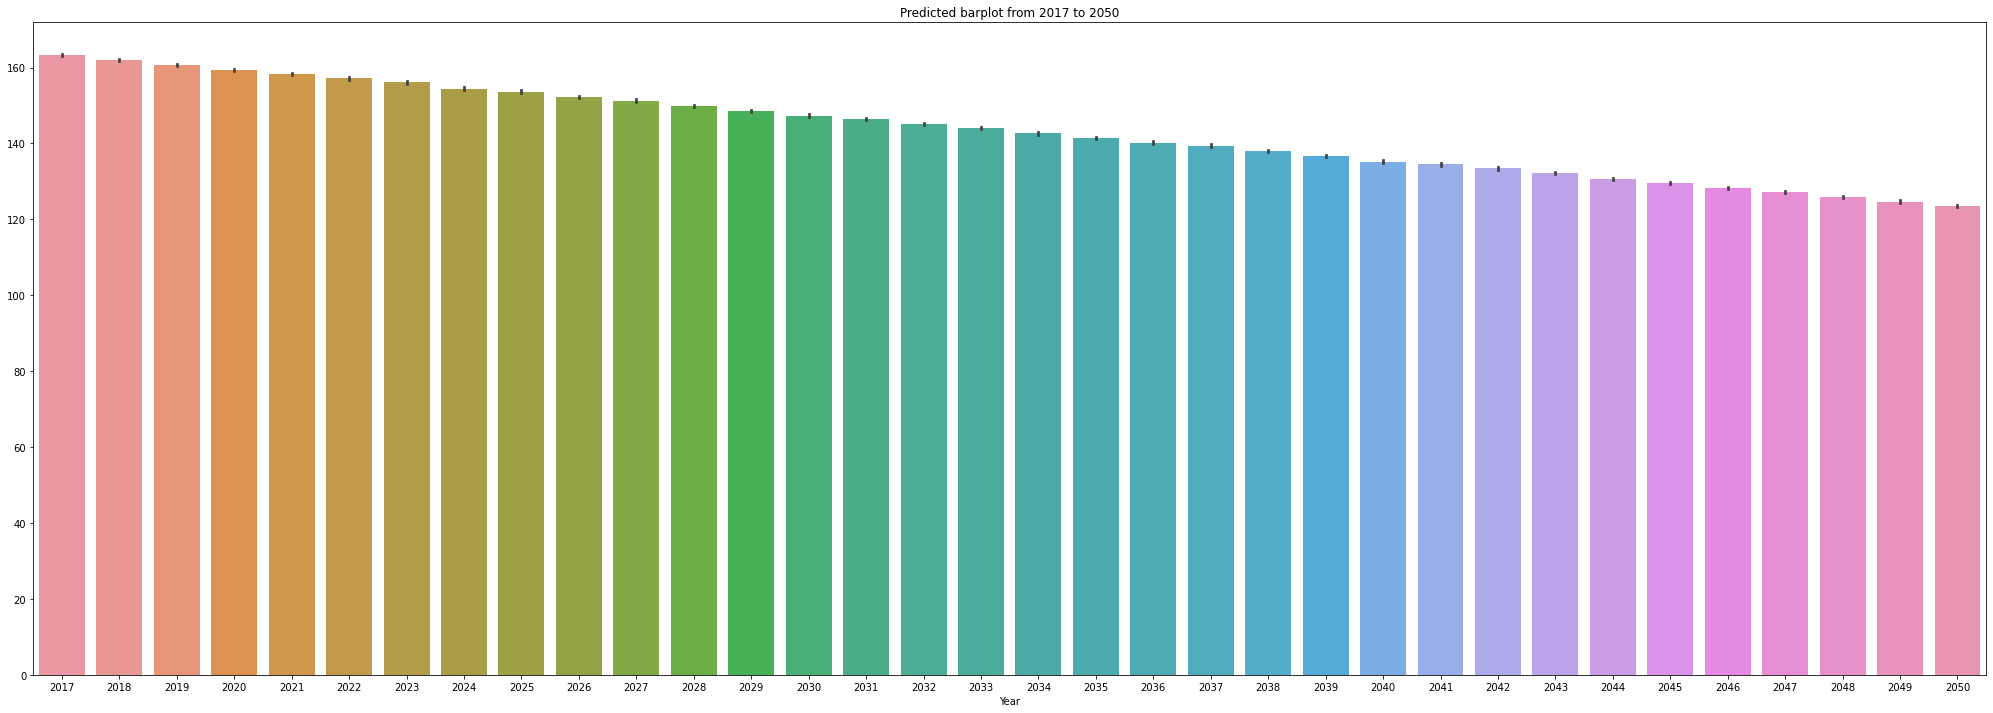

In [32]:
x=df[['Year','Station']]
y=df['Rainfall']
Reg.fit(x,y)
plt.figure(figsize=(25,12))
sns.scatterplot(df['Year'],df['Rainfall'])
plt.plot(df['Year'],Reg.predict(df[['Year','Station']]))
plt.title("Best fit line for Previous data")
plt.figure(figsize=(35,12))
sns.barplot(test_df['Year'],Reg.predict(test_df[['Year','Station']]))
plt.title("Predicted barplot from 2017 to 2050")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Predicted barplot from 2017 to 2050')

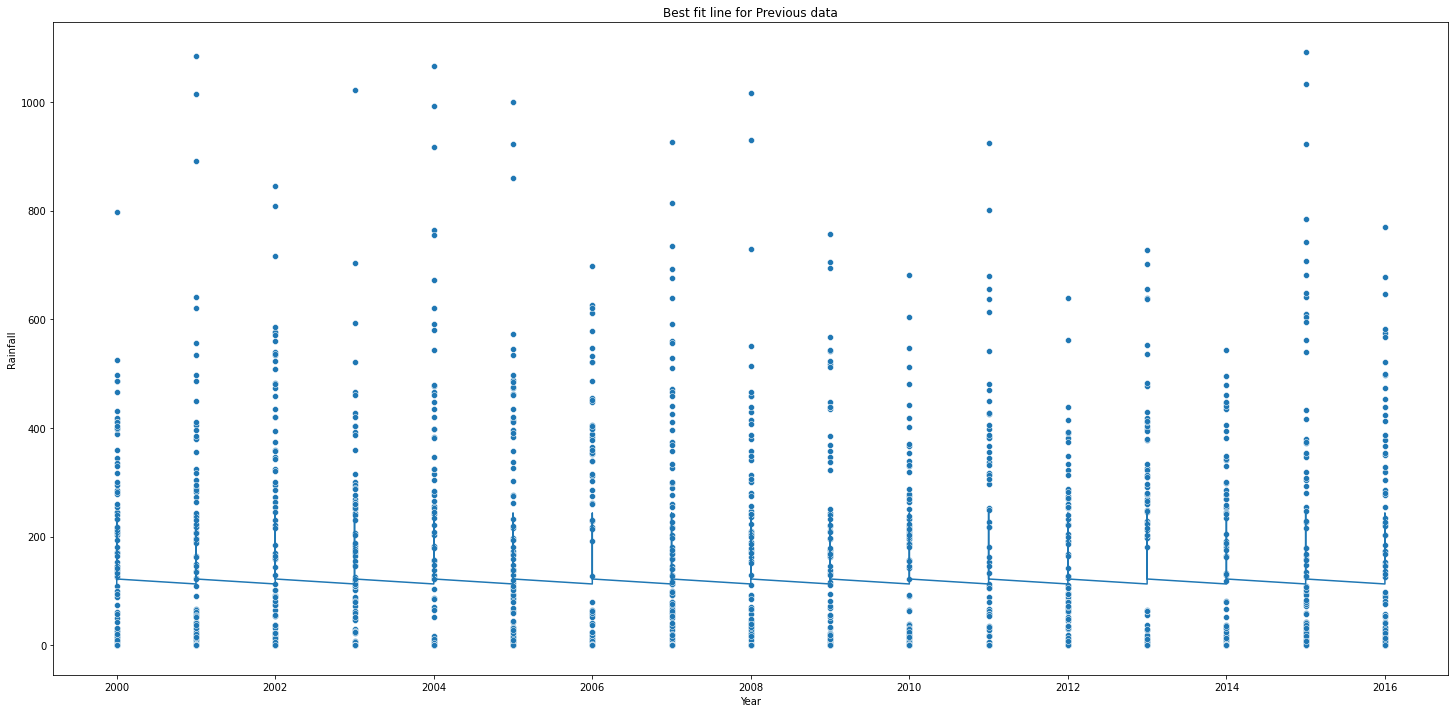

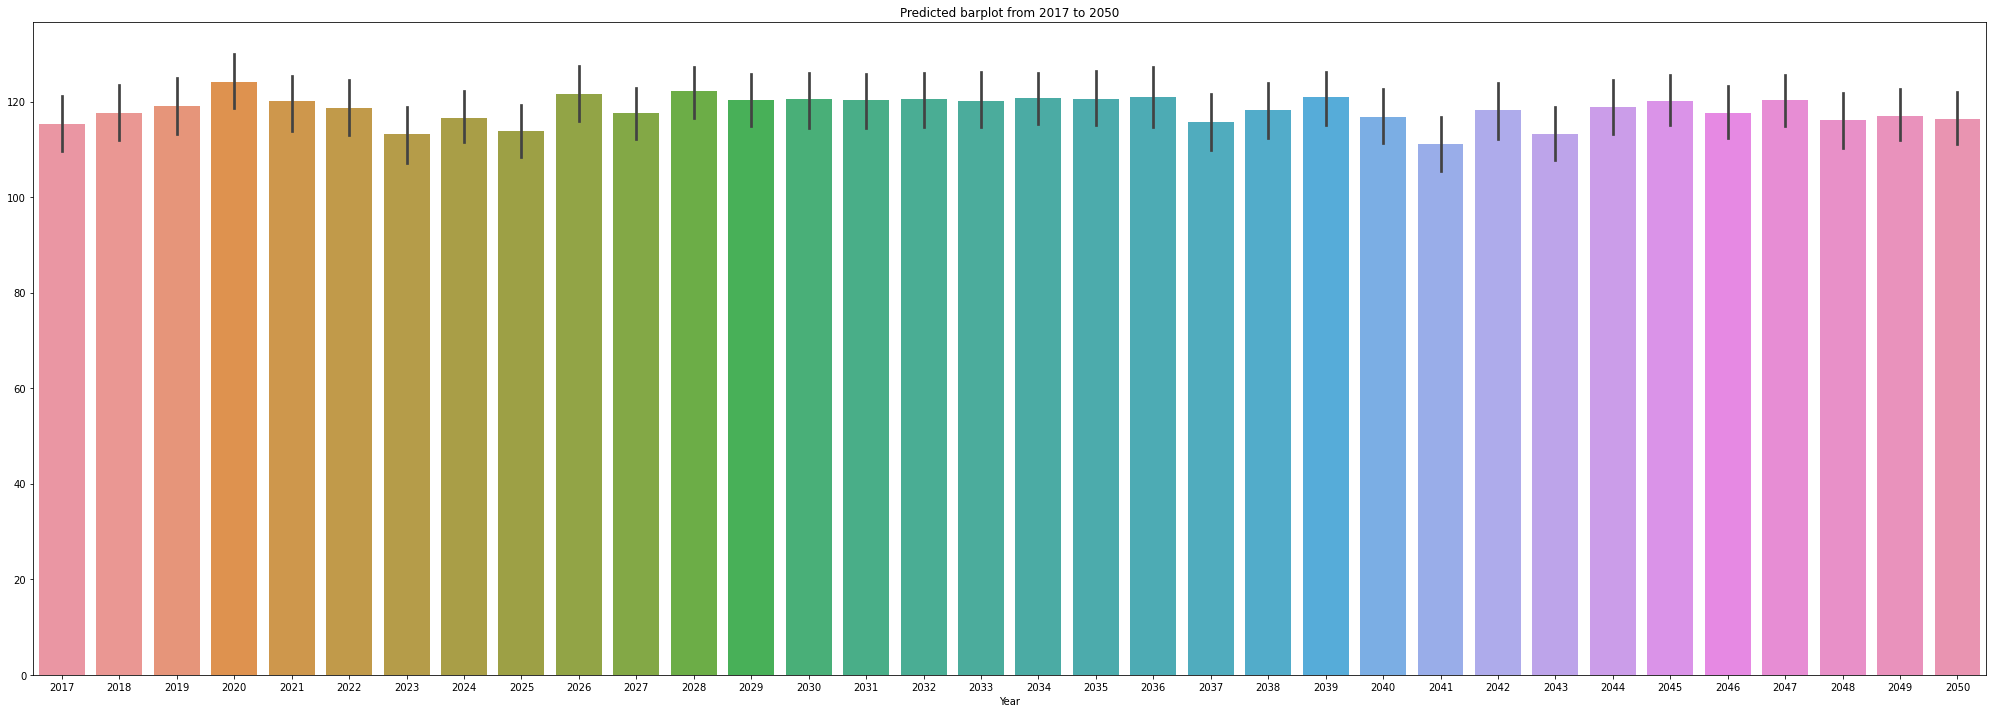

In [33]:
x=df[['Station','Month']]
y=df['Rainfall']
Reg.fit(x,y)
plt.figure(figsize=(25,12))
sns.scatterplot(df['Year'],df['Rainfall'])
plt.plot(df['Year'],Reg.predict(df[['Station','Month']]))
plt.title("Best fit line for Previous data")
plt.figure(figsize=(35,12))
sns.barplot(test_df['Year'],Reg.predict(test_df[['Station','Month']]))
plt.title("Predicted barplot from 2017 to 2050")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Predicted barplot from 2017 to 2050')

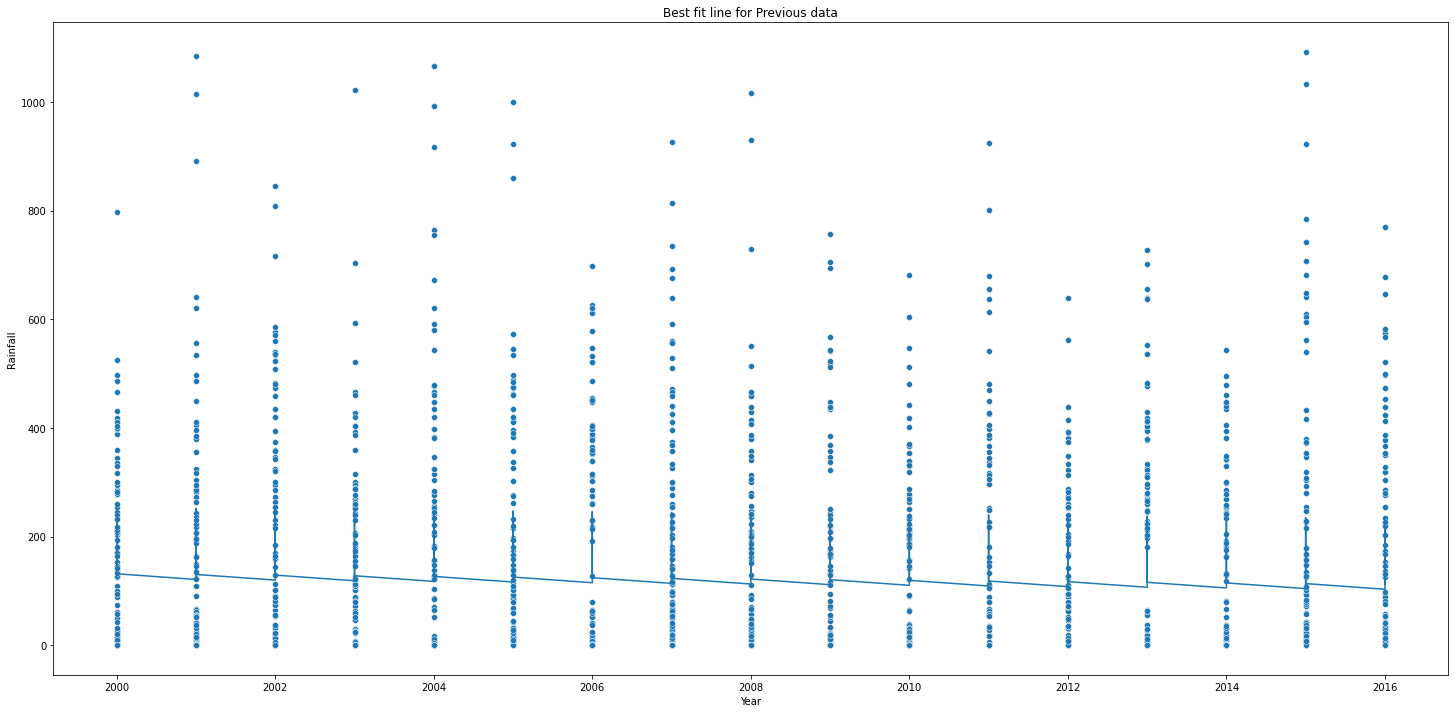

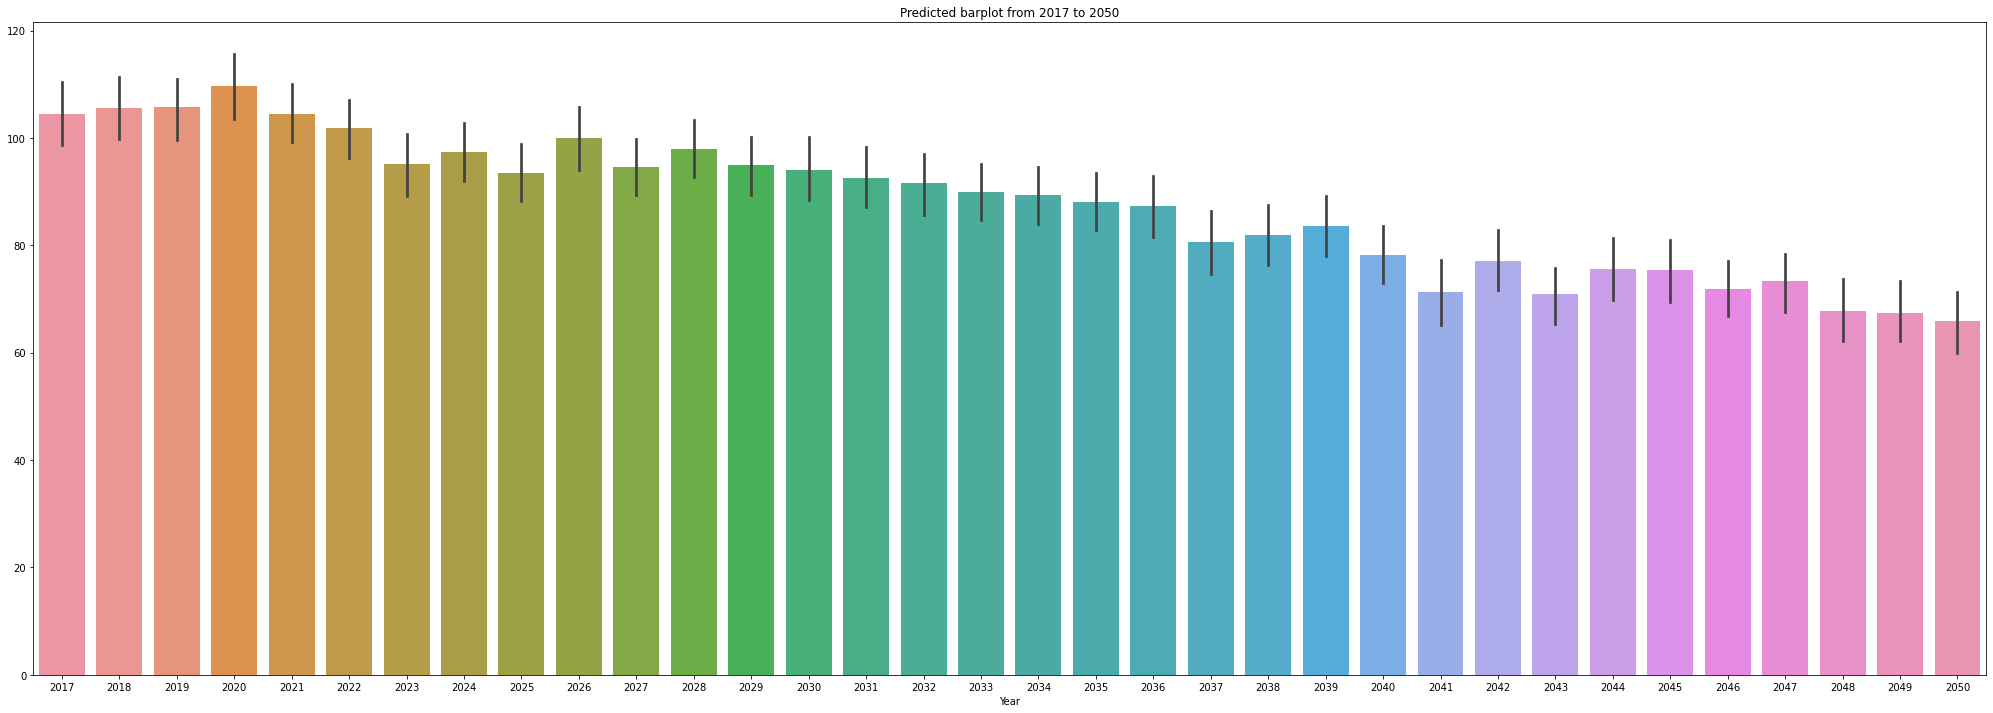

In [34]:
x=df.drop(['Rainfall'],axis=1)
y=df['Rainfall']
Reg=LinearRegression()
Reg.fit(x,y)
plt.figure(figsize=(25,12))
sns.scatterplot(df['Year'],df['Rainfall'])
plt.plot(df['Year'],Reg.predict(df[['Year','Station','Month']]))
plt.title("Best fit line for Previous data")
plt.figure(figsize=(35,12))
sns.barplot(test_df['Year'],Reg.predict(test_df[['Year','Station','Month']]))
plt.title("Predicted barplot from 2017 to 2050")